# Import Packages

In [3]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  # root = '/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import pandas as pd
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim
import neuroeconomics_jaimeNLL as neconJaime
import neuroeconomics as necon
from variableCoding import Vars
import seaborn as sns
_v_ = Vars()

import plotly.express as px

beahviour_cols = necon.optimize_cols[:-4]

def get_probLottery(group):
  '''
  Missed Trials should be removed and choices should be coded as 0 and 1 (reference and lottery, respectly)
  '''
  prob_lotteryChoice = len(group[group['choice'] == 1]) / len(group)
  return prob_lotteryChoice

Running Code locally


# Testing Functions & routines

## Task parameters

In [4]:
# # ---------------------------- Levy & Glimcher ------------------------------

# uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                                  # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]        # Lottery option

# # Same-type task variables
# st_money_refQs = [2]                            # Dolars
# st_money_lottQs = [2, 4.5, 10, 22.5, 50]        # Dolars

# st_cPlus_refQs = [5]                            # candies
# st_cPlus_refQs = [5, 10, 20, 40, 80]           # candies
# # st_cPlus_lottQs = [2]                          # crackers
# # st_cPlus_lottQs = [2, 5, 10, 20, 40]          # crackers

# st_cMinus_refQs = [60]                          # mL water
# st_cMinus_lottQs = [60, 125, 250, 500, 1000]    # mL water

# # Mixed-type task variables
# mt_refQs = [.2]                                 # Dolars
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [10, 20, 30, 50,  80]         # candies
# # mt_cPlus_lottQs = [5, 10, 15, 25,  40]        # candies
# mt_cMinus_lottQs = [125, 250, 400, 600,  1000]  # water 

# ------------------------------ NUTRECON v1 --------------------------------

# uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                              # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# # Same-type task variables
# st_money_lottQs = [1]                               # Euros
# st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

# st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
# st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

# st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
# st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# # Mixed-type task variables
# mt_refQs = [.2]                                # Euros
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
# mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 

# ------------------------------ NUTRECON v2 --------------------------------

uniqueLott_Nreps= 7      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [2]                               # Euros
st_money_lottQs = [2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 60, 120]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [20, 40, 60, 120]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}\n\nTotal number of trials: {}'.format(allTrials_df['trial_type'].value_counts(), len(allTrials_df)))

Trials per type:
same     420
mixed    280
Name: trial_type, dtype: int64

Total number of trials: 700


In [7]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta

cPlus_sFactor = .2
cMinus_sFactor = .2

subject_pars_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                           mt_cPlus_beta, mt_cMinus_beta, cPlus_sFactor, cMinus_sFactor, allTrials_df)
subject_pars_df

## Subject specific parameters

In [8]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = st_money_beta
mt_cMinus_beta = st_money_beta

cPlus_sFactor = .2
cMinus_sFactor = .2

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,same,Money,2.0,1,Money,2,0.13,0.7,0.7,5.0,1.0
1,same,Money,2.0,1,Money,2,0.22,0.7,0.7,5.0,1.0
2,same,Money,2.0,1,Money,2,0.38,0.7,0.7,5.0,1.0
3,same,Money,2.0,1,Money,2,0.50,0.7,0.7,5.0,1.0
4,same,Money,2.0,1,Money,2,0.75,0.7,0.7,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
695,mixed,Money,0.2,1,CS-,120,0.13,0.7,0.4,5.0,0.2
696,mixed,Money,0.2,1,CS-,120,0.22,0.7,0.4,5.0,0.2
697,mixed,Money,0.2,1,CS-,120,0.38,0.7,0.4,5.0,0.2
698,mixed,Money,0.2,1,CS-,120,0.50,0.7,0.4,5.0,0.2


,ref_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,2.0,0.13,0.7,0.7,5.0,1.0
1,2.0,0.22,0.7,0.7,5.0,1.0
2,2.0,0.38,0.7,0.7,5.0,1.0
3,2.0,0.50,0.7,0.7,5.0,1.0
4,2.0,0.75,0.7,0.7,5.0,1.0
...,...,...,...,...,...,...
695,0.2,0.13,0.7,0.4,5.0,0.2
696,0.2,0.22,0.7,0.4,5.0,0.2
697,0.2,0.38,0.7,0.4,5.0,0.2
698,0.2,0.50,0.7,0.4,5.0,0.2


In [46]:
df = subjectTrials_df.copy()

numeric_df = subjectTrials_df.apply(pd.to_numeric, errors='ignore').select_dtypes('float', 'int')

arr = numeric_df.values
arr_labels = numeric_df.columns

In [47]:
columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']

ref_prob_arr = arr[:, arr_labels == columns[0]]
ref_qt_arr = arr[:, arr_labels == columns[1]]
ref_alpha_arr = arr[:, arr_labels == columns[2]]

lott_prob_arr = arr[:, arr_labels == columns[3]]
lott_qt_arr = arr[:, arr_labels == columns[4]]
lott_alpha_arr = arr[:, arr_labels == columns[5]]

beta_arr = arr[:, arr_labels == columns[6]]
sFactor_arr = arr[:, arr_labels == columns[7]]

euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)

In [65]:
# df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
#            'lott_prob', 'lott_qt', 'lott_alpha', 
#            'beta', 'sFactor', 'choice']):
    
st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def _get_choices(df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']):
    
    numeric_df = df.apply(pd.to_numeric, errors='ignore').select_dtypes('float', 'int')

    arr = numeric_df.values
    arr_labels = numeric_df.columns

    ref_prob_arr = arr[:, arr_labels == columns[0]]
    ref_qt_arr = arr[:, arr_labels == columns[1]]
    ref_alpha_arr = arr[:, arr_labels == columns[2]]

    lott_prob_arr = arr[:, arr_labels == columns[3]]
    lott_qt_arr = arr[:, arr_labels == columns[4]]
    lott_alpha_arr = arr[:, arr_labels == columns[5]]

    beta_arr = arr[:, arr_labels == columns[6]]
    sFactor_arr = arr[:, arr_labels == columns[7]]

    euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
    euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
    pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)
    choices = np.random.uniform(size=euR.shape) < pL
    return choices

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       print('hello')
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def _get_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    trial_type_arr = df[cols[0]].values
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 6:
       # Three alphas, one beta and two scaling factors (beta is unpacked directly)
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta, 
       cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha      # This should never happen
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha    # This should never happen

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == money_id)] = st_money_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cPlus_id)] = st_cPlus_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cMinus_id)] = st_cMinus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == cMinus_id)] = mt_cPlus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == money_id)] = mt_cMinus_beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cPlus_sFactor


    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood



In [66]:
import numpy as np
import random 
import pandas as pd
from scipy.optimize import minimize


st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def _get_choices(df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']):
    
    numeric_df = df.apply(pd.to_numeric, errors='ignore').select_dtypes('float', 'int')

    arr = numeric_df.values
    arr_labels = numeric_df.columns

    ref_prob_arr = arr[:, arr_labels == columns[0]]
    ref_qt_arr = arr[:, arr_labels == columns[1]]
    ref_alpha_arr = arr[:, arr_labels == columns[2]]

    lott_prob_arr = arr[:, arr_labels == columns[3]]
    lott_qt_arr = arr[:, arr_labels == columns[4]]
    lott_alpha_arr = arr[:, arr_labels == columns[5]]

    beta_arr = arr[:, arr_labels == columns[6]]
    sFactor_arr = arr[:, arr_labels == columns[7]]

    euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
    euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
    pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)
    choices = np.random.uniform(size=euR.shape) < pL
    return choices

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       print('hello')
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def _get_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    trial_type_arr = df[cols[0]].values
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 6:
       # Three alphas, one beta and two scaling factors (beta is unpacked directly)
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta, 
       cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha      # This should never happen
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha    # This should never happen

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == money_id)] = st_money_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cPlus_id)] = st_cPlus_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cMinus_id)] = st_cMinus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == cMinus_id)] = mt_cPlus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == money_id)] = mt_cMinus_beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cPlus_sFactor


    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def stepwise_estimate_MultiOpt(args, x0, N_optimizers):

    def _get_iter_params(xk):
        iter_params_list.append(xk.tolist())
    
    df = args
    st_mask = df[optimize_cols[0]] == 'same'
    mt_mask = df[optimize_cols[0]] == 'mixed'

    cPlus_mask = df[optimize_cols[4]] == 'CS+'
    cMinus_mask = df[optimize_cols[4]] == 'CS-'

    # Unpack initialization parameters
    if len(x0) == 6:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    beta)
        mt_params = (cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'beta']
        mt_params_colNames = ['CS+ sFactor', 'CS- sFactor']
    elif len(x0) == 10:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta,
            mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    st_money_beta, st_cPlus_beta, st_cMinus_beta)
        mt_params = (mt_cPlus_beta, mt_cMinus_beta,
                    cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'Money beta', 'CS+ st beta', 'CS- st beta', ]
        mt_params_colNames = ['CS+ mt beta', 'CS- mt beta',
                                'CS+ sFactor', 'CS- sFactor']

    for n_opt in range(N_optimizers):
        x0_st_params = tuple([random.uniform(*pars) for pars in st_params])
        # Estimate parameters from Same type trials
        iter_params_list = []
        res_st_ = minimize(_get_st_nll, x0_st_params, args=df.loc[st_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_st = res_st_
        else:
            if res_st_.fun < res_st.fun:
                res_st = res_st_

    st_iterParams_df = pd.DataFrame(iter_params_list, columns=st_params_colNames)

    # map same type estimation results to required fields
    df.loc[mt_mask, optimize_cols[8]] = res_st.x[0]                 # Money alpha
    df.loc[mt_mask & cPlus_mask, optimize_cols[9]] = res_st.x[1]    # CS+ alpha
    df.loc[mt_mask & cMinus_mask, optimize_cols[9]] = res_st.x[2]   # CS- alpha
    if len(x0) == 6:
        df.loc[mt_mask, optimize_cols[10]] = res_st.x[3]              # beta
    for n_opt in range(N_optimizers):
        x0_mt_params = tuple([random.uniform(*pars) for pars in mt_params])
        # Estimate parameters from mixed type trials
        iter_params_list = []
        res_mt_ = minimize(_get_mt_nll, x0_mt_params, args=df.loc[mt_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_mt = res_mt_
        else:
            if res_mt_.fun < res_st.fun:
                res_mt = res_mt_
    mt_iterParams_df = pd.DataFrame(iter_params_list, columns=mt_params_colNames)

    return res_st, res_mt, st_iterParams_df, mt_iterParams_df

### Simulate choices

In [4]:
seed = 1
np.random.seed(seed)

In [5]:
subjectTrials_df = sim._get_subject_choices(subjectTrials_df)



subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()

title = 'Choices'

hover_cols = ['lott_type']
hover_data = {key:False for key in subject_choiceCount_df.columns}

fig = px.line(subject_choiceCount_df, facet_col = 'lott_type', facet_row = 'trial_type',
            x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            color='lott_prob',  markers=True,
            symbol = 'lott_prob', 
            color_discrete_sequence = px.colors.sequential.dense,
            hover_data = hover_data, 
            category_orders= {
                        'lottery p': sorted(list(subject_choiceCount_df[beahviour_cols[-2]].unique())),
                        }
                )
fig.update_layout(
    title = title,
    legend_title="Subject ID, reward",
)                                
fig.update_xaxes(matches=None)

fig.show()

## Parameter Estimation

In [6]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [7]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters

df = subjectTrials_df.copy()

x0 = x0_6params

df['likelihood'] = df.apply(lambda row: necon._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [8]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

x0 = x0_10params


df['likelihood'] = df.apply(lambda row: necon._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [9]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

x0 = x0_6params

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [10]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

x0 = x0_10params


(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Likelihood calculation as Jaime

In [11]:
df. columns

Index(['trial_type', 'ref_type', 'ref_qt', 'ref_prob', 'lott_type', 'lott_qt',
       'lott_prob', 'ref_alpha', 'lott_alpha', 'beta', 'sFactor', 'ref_EU',
       'lott_EU', 'pL', 'choice', 'likelihood', 'ref_alpha_est',
       'lott_alpha_est'],
      dtype='object')

In [17]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters

df = subjectTrials_df.copy()
# df = df[(df['trial_type'] == 'mixed') & 
#         (df['lott_type'] == 'CS+')]

x0 = x0_6params

df['nll_jaime'] = df.apply(lambda row: neconJaime._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL', 'lott_EU','choice', 'nll_jaime']].copy()
tmp_df['lott_EU'] = (tmp_df['lott_EU']/tmp_df['lott_EU'].max()) * 20

tmp_df['nll_jaime'] = tmp_df['nll_jaime']

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'from pL'] = -np.log(1 - tmp_df.loc[mask_0,'pL'])
tmp_df.loc[mask_1,'from pL'] = -np.log(tmp_df.loc[mask_1,'pL'])
tmp_df['check'] = tmp_df['from pL'] - tmp_df['nll_jaime']

if tmp_df['check'].round(10).max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


# tmp_longdf = tmp_df.melt(id_vars=['pL', 'choice'], var_name='Computation', value_name='NegLogLikelihood' ).sort_values(by=['Computation', 'pL'])

# fig = px.line(tmp_longdf, x = 'pL', y = 'NegLogLikelihood', 
#               color = 'Computation', line_dash='choice', text='choice', symbol='choice')
# # create a dictionary that maps each unique value in the 'choice' column to a specific color
# color_map = {choice: color for choice, color in zip(tmp_longdf['choice'].unique(), px.colors.qualitative.Pastel)}

# fig.update_traces(mode='markers+lines', 
                #   marker=dict(size=12, color=[color_map[x] for x in tmp_longdf['choice']]))



fig.show()

Likelihood well calculated.


In [14]:
tmp_df

,pL,lott_EU,choice,nll_jaime,from pL,check
0,0.000852,0.514094,0,0.000853,0.000853,-4.580754e-16
1,0.001769,0.870005,0,0.001771,0.001771,1.546072e-16
2,0.006458,1.502736,0,0.006479,0.006479,-4.336809e-18
3,0.016936,1.977284,0,0.017081,0.017081,-2.359224e-16
4,0.116024,2.965926,0,0.123326,0.123326,-8.326673e-17
...,...,...,...,...,...,...
695,0.323363,2.147801,0,0.390621,0.390621,0.000000e+00
696,0.468159,3.634739,0,0.631411,0.631411,-3.330669e-16
697,0.722796,6.278186,0,1.283000,1.283000,-2.220446e-16
698,0.854806,8.260772,1,0.156881,0.156881,-5.551115e-17


In [ ]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

x0 = x0_10params


df['likelihood'] = df.apply(lambda row: necon._get_likelihood(row, x0), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [ ]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

x0 = x0_6params

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [ ]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

x0 = x0_10params


(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: necon._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: necon._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [42]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor

# alphaMoney0 = 1
# alphaCplus0 = 1
# alphaCminus0 = 1
# st_betaMoney0 = 1 # also used in model with only one beta
# st_betaCplus0 = 1
# st_betaCminus0 = 1
# mt_betaCplus0 = 1
# mt_betaCminus0 = 1
# sFactorCplus0 = 1
# sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [44]:

args = (subjectTrials_df.copy())


res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_6params)

sim.print_stepwiseModel_output(res_st, res_mt)



Same type trials
  Optimization terminated successfully.
    - parameters: [0.62522724 0.49167796 0.39369597 2.503762  ]
  - std. error: [0.04268759 0.03082545 0.03688956 0.31206495]

Confidene intervals:
  - parameter 1: 0.625 ± 0.084
  - parameter 2: 0.492 ± 0.06
  - parameter 3: 0.394 ± 0.072
  - parameter 4: 2.504 ± 0.612

Mixed type trials
  Optimization terminated successfully.
    - parameters: [0.05821018 0.09253548]
  - std. error: [0.01406591 0.02260033]

  Confidene intervals:
    - parameter 1: 0.058 ± 0.028
    - parameter 2: 0.093 ± 0.044


In [46]:
args = (subjectTrials_df.copy())
res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_10params)
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  Optimization terminated successfully.
    - parameters: [0.63354426 0.48782619 0.38869786 2.29898666 2.70301362 2.68262826]
  - std. error: [0.04531925 0.03291041 0.03903932 0.45379942 0.70044118 0.63225645]

Confidene intervals:
  - parameter 1: 0.634 ± 0.089
  - parameter 2: 0.488 ± 0.065
  - parameter 3: 0.389 ± 0.077
  - parameter 4: 2.299 ± 0.889
  - parameter 5: 2.703 ± 1.373
  - parameter 6: 2.683 ± 1.239

Mixed type trials
  Optimization terminated successfully.
    - parameters: [2.23564198 1.61170031 0.05753462 0.08555644]
  - std. error: [0.88087347 0.88741053 0.01614043 0.03710087]

  Confidene intervals:
    - parameter 1: 2.236 ± 1.727
    - parameter 2: 1.612 ± 1.739
    - parameter 3: 0.058 ± 0.032
    - parameter 4: 0.086 ± 0.073


In [49]:
res = sim.simultaneous_estimate(args, x0_6params)
sim.print_simultaneousModel_output(res)

Optimization terminated successfully.
  - parameters: [0.63746838 0.49457305 0.39486534 2.38930502 0.05579657 0.08928254]
  - std. error: [0.04115274 0.03050291 0.03676871 0.27187695 0.01678902 0.02992483]

Confidene intervals:
  - parameter 1: 0.637 ± 0.081
  - parameter 2: 0.495 ± 0.06
  - parameter 3: 0.395 ± 0.072
  - parameter 4: 2.389 ± 0.533
  - parameter 5: 0.056 ± 0.033
  - parameter 6: 0.089 ± 0.059


In [47]:
res = sim.simultaneous_estimate(args, x0_10params)
sim.print_simultaneousModel_output(res)

Desired error not necessarily achieved due to precision loss.
  - parameters: [0.63354429 0.48833297 0.38736007 2.29898628 2.69887005 2.69135603
 2.23545582 1.61291761 0.0573929  0.08614715]
  - std. error: [0.04906449 0.03850013 0.04764221 0.43249749 1.47135602 1.15211239
 1.04321007 1.23438511 0.02531784 0.048082  ]

Confidene intervals:
  - parameter 1: 0.634 ± 0.096
  - parameter 2: 0.488 ± 0.075
  - parameter 3: 0.387 ± 0.093
  - parameter 4: 2.299 ± 0.848
  - parameter 5: 2.699 ± 2.884
  - parameter 6: 2.691 ± 2.258
  - parameter 7: 2.235 ± 2.045
  - parameter 8: 1.613 ± 2.419
  - parameter 9: 0.057 ± 0.05
  - parameter 10: 0.086 ± 0.094


# Simulate behaviour and look at choices here

## Task Parameters

In [50]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [51]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Run simulation and plot behaviour

In [15]:
beahviour_cols[:-1]

['trial_type',
 'ref_type',
 'ref_qt',
 'ref_prob',
 'lott_type',
 'lott_qt',
 'lott_prob']

100%|██████████| 100/100 [00:08<00:00, 12.20it/s]


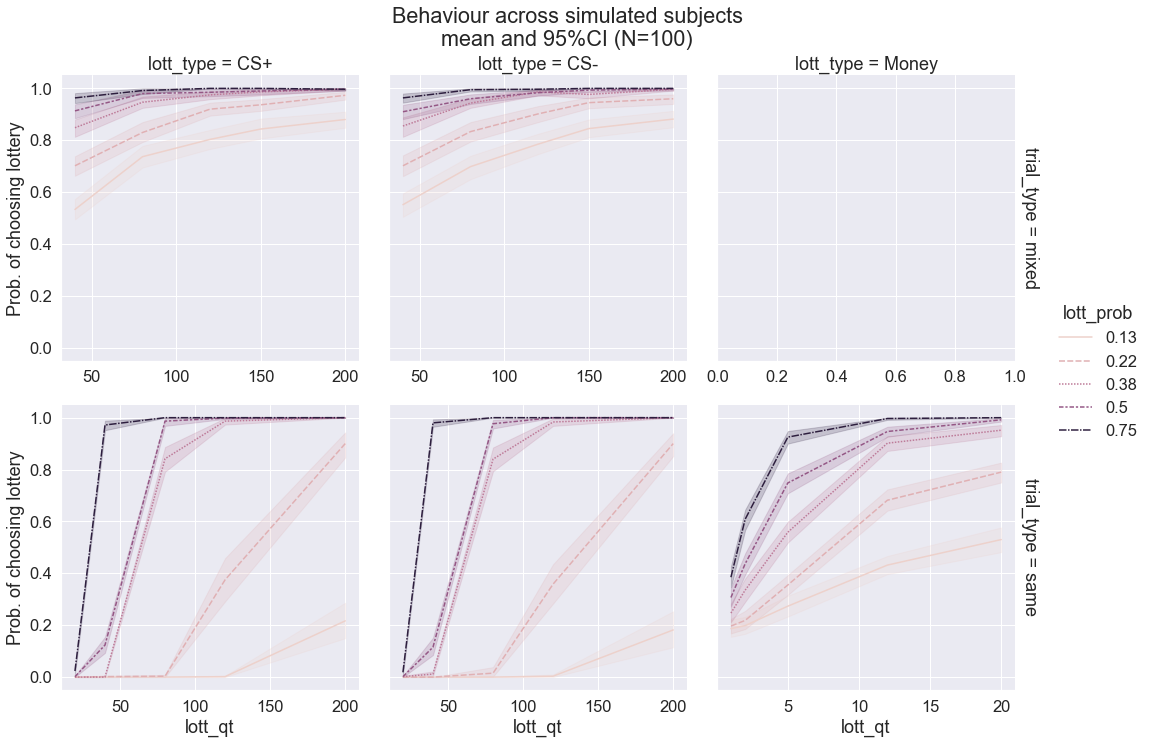

In [52]:
from tqdm import tqdm
from numpy import random

N_subs = 100
x0 = x0_10params

#                         (mean, sd, N_subs)
mean_std_st_money_alpha = (0.7, 0.1, N_subs)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_subs)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_subs)
mean_std_st_money_beta = (1.8, 0.3, N_subs)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_subs)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))

cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr,] )

    mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])
    
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
    st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

    mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                        cPlus_sFactor_arr, cMinus_sFactor_arr])
    
st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_subs))
mt_estPars = np.zeros((mt_param_size, N_subs))
st_hessians = np.zeros((st_param_size, st_param_size, N_subs))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_subs))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_subs)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i
    
    if i == 0:
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
        
import seaborn as sns
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_subs), va='bottom');

# Test Fits

## Start from parameter used for choice simulation

### Task Parameters

In [116]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


### Initialization Parameters

In [117]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

Starting optimization from true parameters


100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


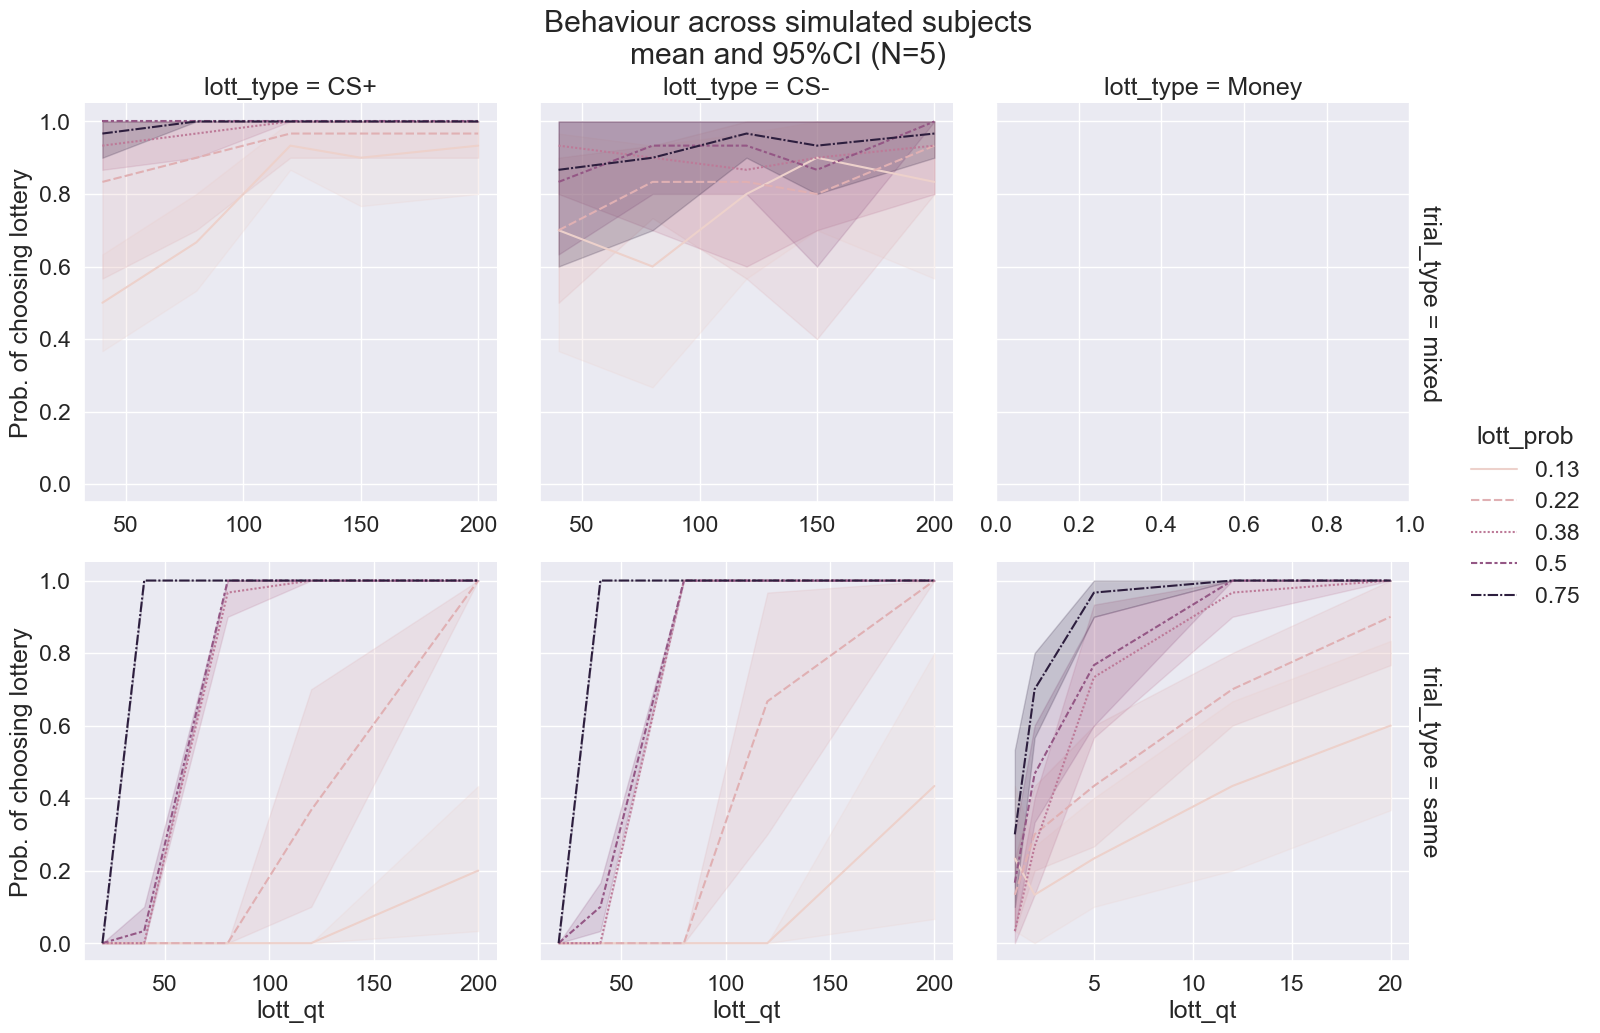

In [123]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 5
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = sim.simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    output = 'long_flags')

### Pack same type trials results and plot parameters

In [124]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
st_po_df

,n_sub,parameter,Observed value,Predicted value,model fit
0,0,Money alpha,0.889706,0.885252,Optimization terminated successfully.
1,0,CS+ alpha,0.840448,0.832390,Optimization terminated successfully.
2,0,CS- alpha,0.822097,0.842803,Optimization terminated successfully.
3,0,beta,1.924436,2.882112,Optimization terminated successfully.
4,1,Money alpha,0.636696,0.626923,Desired error not necessarily achieved due to ...
5,1,CS+ alpha,0.844085,0.842019,Desired error not necessarily achieved due to ...
6,1,CS- alpha,0.948743,0.948629,Desired error not necessarily achieved due to ...
7,1,beta,2.238898,2.618214,Desired error not necessarily achieved due to ...
8,2,Money alpha,0.747488,0.690682,Optimization terminated successfully.
9,2,CS+ alpha,0.796748,0.815260,Optimization terminated successfully.


In [125]:
print(st_po_df['model fit'].unique())
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
st_pars_minMax

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


,min,max
parameter,,
Money alpha,0.636696,0.889706
CS+ alpha,0.796748,0.909993
CS- alpha,0.809829,0.948743
beta,1.412372,2.238898


In [126]:
col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
                  label=dict(text="ideal result", textposition = 'bottom right', 
                             xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")

### Pack mixed type trials results and plot parameters

In [127]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
mt_po_df

,n_sub,parameter,Observed value,Predicted value,model fit
0,0,CS+ sFactor,0.144472,0.109100,Desired error not necessarily achieved due to ...
1,0,CS- sFactor,0.161293,0.094761,Desired error not necessarily achieved due to ...
2,1,CS+ sFactor,0.106746,0.085858,Desired error not necessarily achieved due to ...
3,1,CS- sFactor,0.208966,1.805847,Desired error not necessarily achieved due to ...
4,2,CS+ sFactor,0.235434,0.214872,Optimization terminated successfully.
5,2,CS- sFactor,0.014216,0.020928,Optimization terminated successfully.
6,3,CS+ sFactor,0.192862,0.174242,Optimization terminated successfully.
7,3,CS- sFactor,0.146366,0.172153,Optimization terminated successfully.
8,4,CS+ sFactor,0.276461,0.351020,Optimization terminated successfully.
9,4,CS- sFactor,0.190597,0.161691,Optimization terminated successfully.


In [128]:
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
mt_pars_minMax

['Desired error not necessarily achieved due to precision loss.'
 'Optimization terminated successfully.']


,min,max
parameter,,
CS+ sFactor,0.106746,0.276461
CS- sFactor,0.014216,0.208966


In [129]:
col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1, 
                  # label=dict(text="ideal result", textposition = 'bottom left', 
                  #            xanchor = 'left', yanchor='bottom', textangle=0),
                 )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")

## Strat from fixed initial conditions

In [130]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


### Initialization Parameters

In [131]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Fit

Running 10 optimizers per subject with random initial estimates


100%|██████████| 5/5 [01:06<00:00, 13.23s/it]


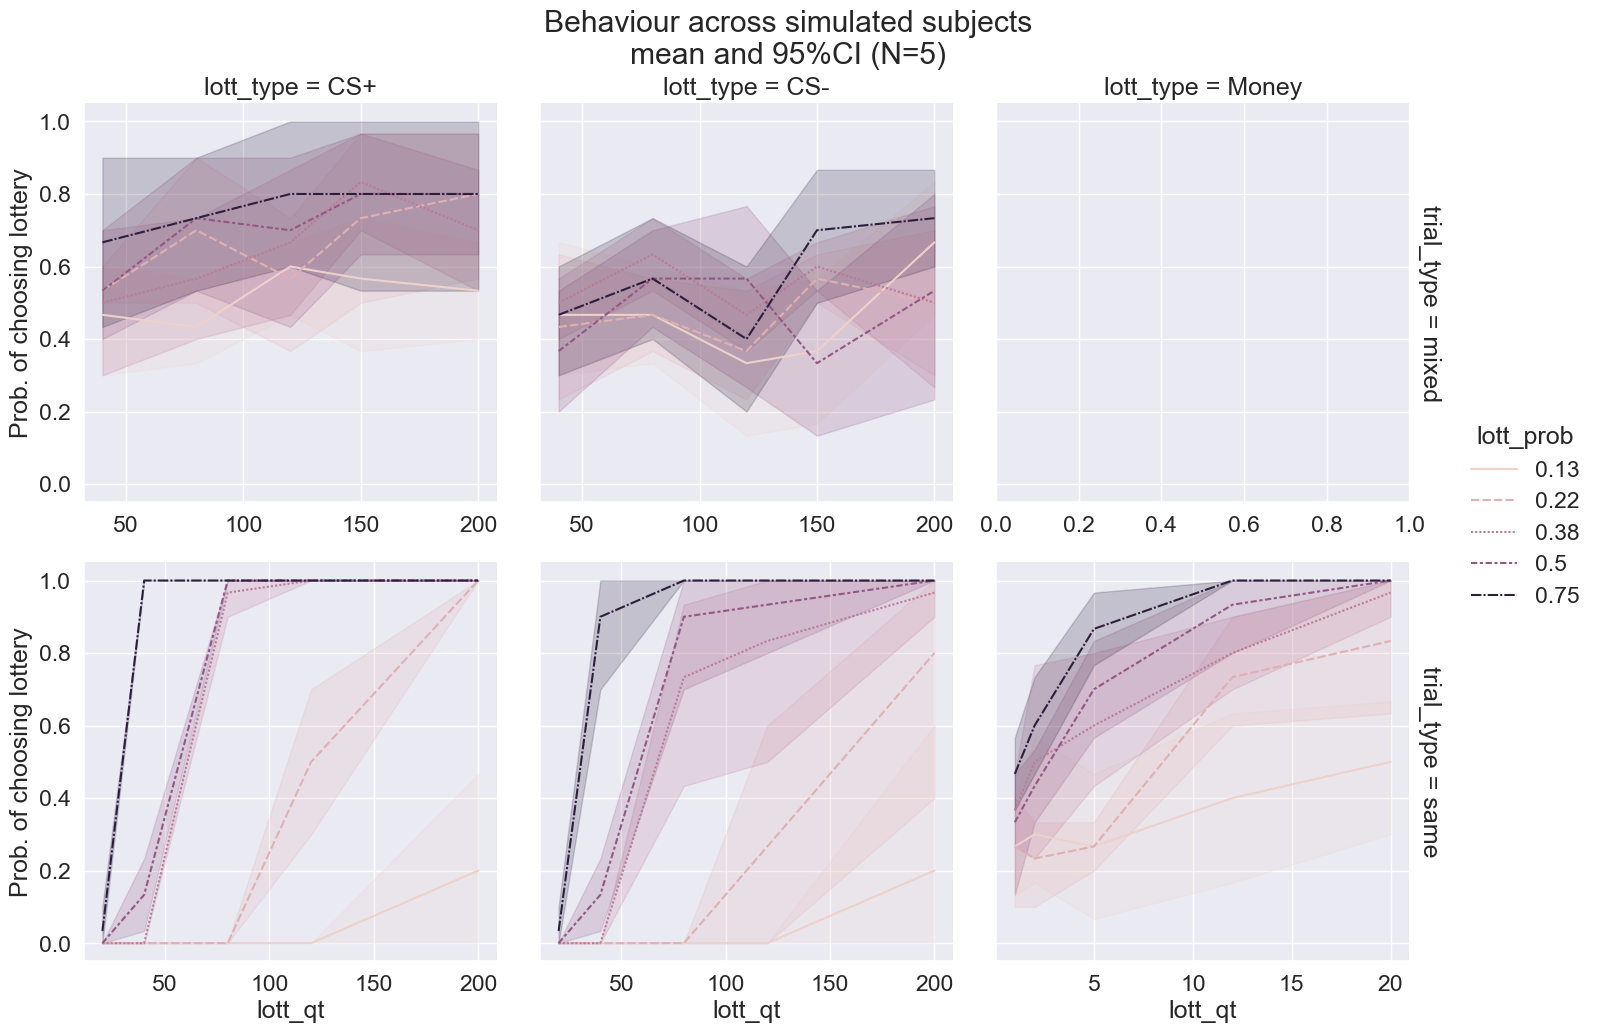

In [255]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 5
x0 = x0_6params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.05)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

startFromBehaviour = False
plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = sim.simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = plot_behaviour, startFromBehaviour = startFromBehaviour,
                                    output = output)

## Multiple optimizers

### Task parameters

In [134]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


### Initialization Parameters

In [223]:
alphaMoney0 = (0.1, 1.5)
alphaCplus0 = (0.1, 1.5)
alphaCminus0 = (0.1, 1.5)

st_betaMoney0 = (0.5, 15) # also used in model with only one beta
st_betaCplus0 = (0.5, 15)
st_betaCminus0 = (0.5, 15)
mt_betaCplus0 = (0.5, 15)
mt_betaCminus0 = (0.5, 15)

sFactorCplus0 = (0.01, 0.5)
sFactorCminus0= (0.01, 0.5)


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Fit

In [136]:
import warnings

In [203]:
import numpy as np
import random 
import pandas as pd
from scipy.optimize import minimize


st_id = 'same'
mt_id = 'mixed'
money_id = 'Money'
cPlus_id = 'CS+'
cMinus_id = 'CS-'

optimize_cols = ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']

def _get_choices(df, columns = ['ref_prob', 'ref_qt', 'ref_alpha', 
           'lott_prob', 'lott_qt', 'lott_alpha', 
           'beta', 'sFactor']):
    
    numeric_df = df.apply(pd.to_numeric, errors='ignore', downcast='float').select_dtypes('float', 'int')

    arr = numeric_df.values
    arr_labels = numeric_df.columns

    ref_prob_arr = arr[:, arr_labels == columns[0]]
    ref_qt_arr = arr[:, arr_labels == columns[1]]
    ref_alpha_arr = arr[:, arr_labels == columns[2]]

    lott_prob_arr = arr[:, arr_labels == columns[3]]
    lott_qt_arr = arr[:, arr_labels == columns[4]]
    lott_alpha_arr = arr[:, arr_labels == columns[5]]

    beta_arr = arr[:, arr_labels == columns[6]]
    sFactor_arr = arr[:, arr_labels == columns[7]]

    euR = necon._calculate_EU(ref_prob_arr, ref_qt_arr, ref_alpha_arr)
    euL = necon._calculate_EU(lott_prob_arr, lott_qt_arr, lott_alpha_arr)
    pL = necon._calculate_pL(euL, euR, beta_arr, sFactor_arr)
    choices = np.random.uniform(size=euR.shape) < pL
    return choices

def _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                 lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                 beta_arr, sFactor_arr, 
                 choice_arr):
    
    euR = ref_prob_arr*ref_qt_arr**ref_alpha_arr 
    euL = lott_prob_arr*lott_qt_arr**lott_alpha_arr

    # Compute things once, sign flip to possibly save one operation
    y = beta_arr*(euR - euL*sFactor_arr)
    chose_ref = choice_arr==False

    # values to be summed up, already negative:
    nll_v = np.log(1 + np.exp(y))
    nll_v[chose_ref] = nll_v[chose_ref] - y[chose_ref]

    return np.sum(nll_v)


def _get_st_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 4:
       # Three alphas, one beta 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[lott_type_arr == money_id] = st_money_beta
       beta_arr[lott_type_arr == cPlus_id] = st_cPlus_beta
       beta_arr[lott_type_arr == cMinus_id] = st_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood


def _get_mt_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)


    # Unpack params
    if len(params) == 2:
       # two scaling factors
       (cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 4:
       # Two betas and two scaling factors
       (mt_cPlus_beta, mt_cMinus_beta,
        cPlus_sFactor, cMinus_sFactor) = params

       # unpack params for trial in question
       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

       beta_arr[lott_type_arr == cMinus_id] = mt_cPlus_beta
       beta_arr[lott_type_arr == money_id] = mt_cMinus_beta

    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def _get_nll(params, df):
    '''
    Computes negative logLikelihood

    columns should have the following order:
              ['trial_type',
              'ref_type', 'ref_qt', 'ref_prob',
              'lott_type', 'lott_qt', 'lott_prob',
              'choice',
              'ref_alpha_est', 'lott_alpha_est', 'beta_est',
              'sFactor_est']
              '''
    
    cols = df.columns
    trial_type_arr = df[cols[0]].values
    reff_type_arr = df[cols[1]].values
    ref_prob_arr = df[cols[3]].values
    ref_qt_arr = df[cols[2]].values
    lott_type_arr = df[cols[4]].values
    lott_prob_arr = df[cols[6]].values
    lott_qt_arr = df[cols[5]].values
    choice_arr = df[cols[7]].values

    ref_alpha_arr = np.zeros(lott_type_arr.shape)
    lott_alpha_arr = np.zeros(lott_type_arr.shape)
    beta_arr = np.zeros(lott_type_arr.shape)
    sFactor_arr = np.ones(lott_type_arr.shape)

    # Unpack params
    if len(params) == 6:
       # Three alphas, one beta and two scaling factors (beta is unpacked directly)
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       beta, 
       cPlus_sFactor, cMinus_sFactor) = params
       
       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha

       beta_arr[:] = beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cMinus_sFactor

    elif len(params) == 6:
       # Three alphas, three betas 
       (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
       st_money_beta, st_cPlus_beta, st_cMinus_beta) = params

       # unpack params for trial in question
       ref_alpha_arr[reff_type_arr == money_id] = st_money_alpha
       ref_alpha_arr[reff_type_arr == cPlus_id] = st_cPlus_alpha      # This should never happen
       ref_alpha_arr[reff_type_arr == cMinus_id] = st_cMinus_alpha    # This should never happen

       lott_alpha_arr[lott_type_arr == money_id] = st_money_alpha
       lott_alpha_arr[lott_type_arr == cPlus_id] = st_cPlus_alpha
       lott_alpha_arr[lott_type_arr == cMinus_id] = st_cMinus_alpha
       
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == money_id)] = st_money_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cPlus_id)] = st_cPlus_beta
       beta_arr[(trial_type_arr == st_id) & (lott_type_arr == cMinus_id)] = st_cMinus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == cMinus_id)] = mt_cPlus_beta
       beta_arr[(trial_type_arr == mt_id) & (lott_type_arr == money_id)] = mt_cMinus_beta

       sFactor_arr[lott_type_arr == cPlus_id] = cPlus_sFactor
       sFactor_arr[lott_type_arr == cMinus_id] = cPlus_sFactor


    negloglikelihood = _compute_nll(ref_prob_arr, ref_qt_arr, ref_alpha_arr,
                                   lott_prob_arr, lott_qt_arr, lott_alpha_arr,
                                   beta_arr, sFactor_arr, 
                                   choice_arr)

    return negloglikelihood

def stepwise_estimate_MultiOpt(args, x0, N_optimizers):

    def _get_iter_params(xk):
        iter_params_list.append(xk.tolist())
    
    df = args
    st_mask = df[optimize_cols[0]] == 'same'
    mt_mask = df[optimize_cols[0]] == 'mixed'

    cPlus_mask = df[optimize_cols[4]] == 'CS+'
    cMinus_mask = df[optimize_cols[4]] == 'CS-'

    # Unpack initialization parameters
    if len(x0) == 6:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    beta)
        mt_params = (cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'beta']
        mt_params_colNames = ['CS+ sFactor', 'CS- sFactor']
    elif len(x0) == 10:
        (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta,
            mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor) = x0
        st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                    st_money_beta, st_cPlus_beta, st_cMinus_beta)
        mt_params = (mt_cPlus_beta, mt_cMinus_beta,
                    cPlus_sFactor, cMinus_sFactor)
        st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                                'Money beta', 'CS+ st beta', 'CS- st beta', ]
        mt_params_colNames = ['CS+ mt beta', 'CS- mt beta',
                                'CS+ sFactor', 'CS- sFactor']

    for n_opt in range(N_optimizers):
        x0_st_params = tuple([random.uniform(*pars) for pars in st_params])
        # Estimate parameters from Same type trials
        iter_params_list = []
        res_st_ = minimize(_get_st_nll, x0_st_params, args=df.loc[st_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_st = res_st_
        else:
            if res_st_.fun < res_st.fun:
                res_st = res_st_

    st_iterParams_df = pd.DataFrame(iter_params_list, columns=st_params_colNames)

    # map same type estimation results to required fields
    df.loc[mt_mask, optimize_cols[8]] = res_st.x[0]                 # Money alpha
    df.loc[mt_mask & cPlus_mask, optimize_cols[9]] = res_st.x[1]    # CS+ alpha
    df.loc[mt_mask & cMinus_mask, optimize_cols[9]] = res_st.x[2]   # CS- alpha
    if len(x0) == 6:
        df.loc[mt_mask, optimize_cols[10]] = res_st.x[3]              # beta
    for n_opt in range(N_optimizers):
        x0_mt_params = tuple([random.uniform(*pars) for pars in mt_params])
        # Estimate parameters from mixed type trials
        iter_params_list = []
        res_mt_ = minimize(_get_mt_nll, x0_mt_params, args=df.loc[mt_mask,:],
                            callback=_get_iter_params)
        if n_opt == 0:
            res_mt = res_mt_
        else:
            if res_mt_.fun < res_st.fun:
                res_mt = res_mt_
    mt_iterParams_df = pd.DataFrame(iter_params_list, columns=mt_params_colNames)

    return res_st, res_mt, st_iterParams_df, mt_iterParams_df

In [208]:
def _simNsubsfit_MultiOpt(allTrials_df, N_subs, x0, 
                                 st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                 st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                 mt_cPlus_beta_arr, mt_cMinus_beta_arr, 
                                 cPlus_sFactor_arr, cMinus_sFactor_arr,
                                 N_optimizers = 50,
                                 plot_behaviour = True, output = 'long_flags'):

    # ---------------------------------------------------------------------------
    # Prelocate mememory and/or create variables for outputs
    
    if len(x0) == 6:
        st_param_size = 4
        mt_param_size = 2
    elif len(x0) == 10:
        st_param_size = 6
        mt_param_size = 4
    
    st_estPars = np.zeros((st_param_size, N_subs))
    mt_estPars = np.zeros((mt_param_size, N_subs))
    if 'flags' in output:
        st_flags = []
        mt_flags = []
    if 'short' not in output:
        st_hessians = np.zeros((st_param_size, st_param_size, N_subs))
        mt_hessians = np.zeros((mt_param_size, mt_param_size, N_subs))
    if 'long' in output:
        st_iterParams_df = pd.DataFrame()
        mt_iterParams_df = pd.DataFrame()
    
    if plot_behaviour:
        subject_choiceCount_df = pd.DataFrame()
    
    for i in tqdm(range(N_subs)):
        # Get parameters per participant
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        st_money_alpha = st_money_alpha_arr[i]
        st_cPlus_alpha = st_cPlus_alpha_arr[i]
        st_cMinus_alpha = st_cMinus_alpha_arr[i]
        st_money_beta = st_money_beta_arr[i]
        st_cPlus_beta = st_cPlus_beta_arr[i]
        st_cMinus_beta = st_cMinus_beta_arr[i]
        mt_cPlus_beta = mt_cPlus_beta_arr[i]
        mt_cMinus_beta = mt_cMinus_beta_arr[i]
        cPlus_sFactor = cPlus_sFactor_arr[i]
        cMinus_sFactor = cMinus_sFactor_arr[i]
        
        # simulate subject behaviour
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)

        subjectTrials_df.insert(7, optimize_cols[7], _get_choices(subjectTrials_df))

        # Pack initial estimates and fit model
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        res_st, res_mt, _st_iterParams_df, _mt_iterParams_df = stepwise_estimate_MultiOpt(subjectTrials_df, x0, N_optimizers)
        
        # prepare plot
        # ¨¨¨¨¨¨¨¨¨¨¨¨
        if plot_behaviour:
            # Compute Probability of chossing lottery per subject
            _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                            list(subjectTrials_df[beahviour_cols].columns[:-1])
                            ).apply(
                        lambda df: necon.get_probLottery(df)), 
                        columns = [_v_.probLotteryChoice_colName]).reset_index()
            _subject_choiceCount_df['n_sub'] = i

            subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)

        # Prepare OUTPUTS
        # ¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
        st_estPars[:, i] = res_st.x
        mt_estPars[:, i] = res_mt.x

        if 'flags' in output:
            st_flags.append(res_st.message)
            mt_flags.append(res_mt.message)

        if 'short' not in output:
            st_hessians[:, :, i] = res_st.hess_inv
            mt_hessians[:, :, i] = res_mt.hess_inv

        if 'long' in output:
            _st_iterParams_df = _st_iterParams_df.reset_index().rename(columns={'index':'iter'},)
            _st_iterParams_df['n_sub'] = i
            
            _mt_iterParams_df = _mt_iterParams_df.reset_index().rename(columns={'index':'iter'},)
            _mt_iterParams_df['n_sub'] = i

            st_iterParams_df = pd.concat([st_iterParams_df, _st_iterParams_df], axis = 0)
            mt_iterParams_df = pd.concat([mt_iterParams_df, _mt_iterParams_df], axis = 0)
    # ---------------------------------------------------------------------------
    # Pack outputs
    if output == 'short':
        out_vars = (st_estPars, mt_estPars)
    elif output == 'short_flags':
        out_vars = (st_estPars, mt_estPars, st_flags, mt_flags)
    elif output == 'medium':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians)
    elif output == 'medium_flags':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians, st_flags, mt_flags)
    elif output == 'long':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians, st_iterParams_df, mt_iterParams_df)
    elif output == 'long_flags':
        out_vars = (st_estPars, mt_estPars, st_hessians, mt_hessians, st_iterParams_df, mt_iterParams_df, st_flags, mt_flags)

    if plot_behaviour:
        out_vars += (subject_choiceCount_df,)
    return out_vars

def simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                 mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                 mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                 mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                 mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                 N_optimizers = 20,
                                 plot_behaviour = True, startFromBehaviour = False,
                                 output = 'long_flags'):

    # ---------------------------------------------------------------------------
    # Create array of parameters used for behaviour simulation

    st_money_alpha_arr = abs(np.random.normal(*mean_std_st_money_alpha, N_subs))
    st_cPlus_alpha_arr = abs(np.random.normal(*mean_std_st_cPlus_alpha, N_subs))
    st_cMinus_alpha_arr = abs(np.random.normal(*mean_std_st_cMinus_alpha, N_subs))
    st_money_beta_arr = abs(np.random.normal(*mean_std_st_money_beta, N_subs))

    cPlus_sFactor_arr = abs(np.random.normal(*mean_std_cPlus_sFactor, N_subs))
    cMinus_sFactor_arr = abs(np.random.normal(*mean_std_cMinus_sFactor, N_subs))

    if len(x0) == 6:
        #model_type = '3 alphas, 1 beta and 2 sFactors'
        st_cPlus_beta_arr = st_money_beta_arr
        st_cMinus_beta_arr = st_money_beta_arr
        mt_cPlus_beta_arr = st_money_beta_arr
        mt_cMinus_beta_arr = st_money_beta_arr
        
        # pack parameters
        st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                        st_money_beta_arr,] )
        mt_pars = np.stack([cPlus_sFactor_arr, cMinus_sFactor_arr])

    else:
        # model_type = '3 alphas, 5 beta and 2 sFactors'    
        st_cPlus_beta_arr = abs(np.random.normal(*mean_std_st_cPlus_beta, N_subs))
        st_cMinus_beta_arr = abs(np.random.normal(*mean_std_st_cMinus_beta, N_subs))
        mt_cPlus_beta_arr = abs(np.random.normal(*mean_std_mt_cPlus_beta, N_subs))
        mt_cMinus_beta_arr = abs(np.random.normal(*mean_std_mt_cMinus_beta, N_subs))
        # pack parameters
        st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                        st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                        ] )
        mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                            cPlus_sFactor_arr, cMinus_sFactor_arr])
    
    # ---------------------------------------------------------------------------
    # Start Loop
    warnings.filterwarnings("ignore")#, category=RuntimeWarning)       # Ignore Optimization Warnings

    try:
        len(x0[0])>1
        # Run multiple optimizers (minRange, maxRange, N_optimizers)
        print('Running {} optimizers per subject with random initial estimates'.format(N_optimizers))
        out_vars = _simNsubsfit_MultiOpt(allTrials_df, N_subs, x0, 
                                 st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                 st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                 mt_cPlus_beta_arr, mt_cMinus_beta_arr, 
                                 cPlus_sFactor_arr, cMinus_sFactor_arr,
                                 N_optimizers = N_optimizers,
                                 plot_behaviour = True, output = 'long_flags')
    except TypeError:
        if startFromBehaviour:
            x0_arr = np.concatenate([st_pars, mt_pars])
            print('Starting optimization from true parameters')
        else:
            print('Starting optimization with fixed values as initial estimates')
            x0_arr = np.repeat(np.expand_dims(np.array(x0), 1), N_subs, axis =1)

        # Fit model with one optimizer
        out_vars =sim._simNsubsfit_oneOptimizer(allTrials_df, N_subs, x0_arr, 
                                 st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                                 st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                                 mt_cPlus_beta_arr, mt_cMinus_beta_arr, 
                                 cPlus_sFactor_arr, cMinus_sFactor_arr,
                                 plot_behaviour = True, output = 'long_flags')
        
    out_vars = (st_pars, mt_pars, ) + out_vars
    
    # ---------------------------------------------------------------------------
    # Plot Behaviour if requested
    if plot_behaviour:
        subject_choiceCount_df = out_vars[-1]
        out_vars = out_vars[:-1]
        sns.set(font_scale=1.5)
        # CREATE FUNTION IN PLOTS FOR THIS!!
        # Throwing a depreciation warning that I want to filter
        g = sns.relplot(
            data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            col=beahviour_cols[-4], row = beahviour_cols[0],
            hue=beahviour_cols[-2], style=beahviour_cols[-2], kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
        )
        g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_subs), va='bottom');
    
    warnings.filterwarnings("always")#, category=RuntimeWarning)        # Turn Warnings back on
    
    # ---------------------------------------------------------------------------

    return out_vars

Running 10 optimizers per subject with random initial estimates


100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


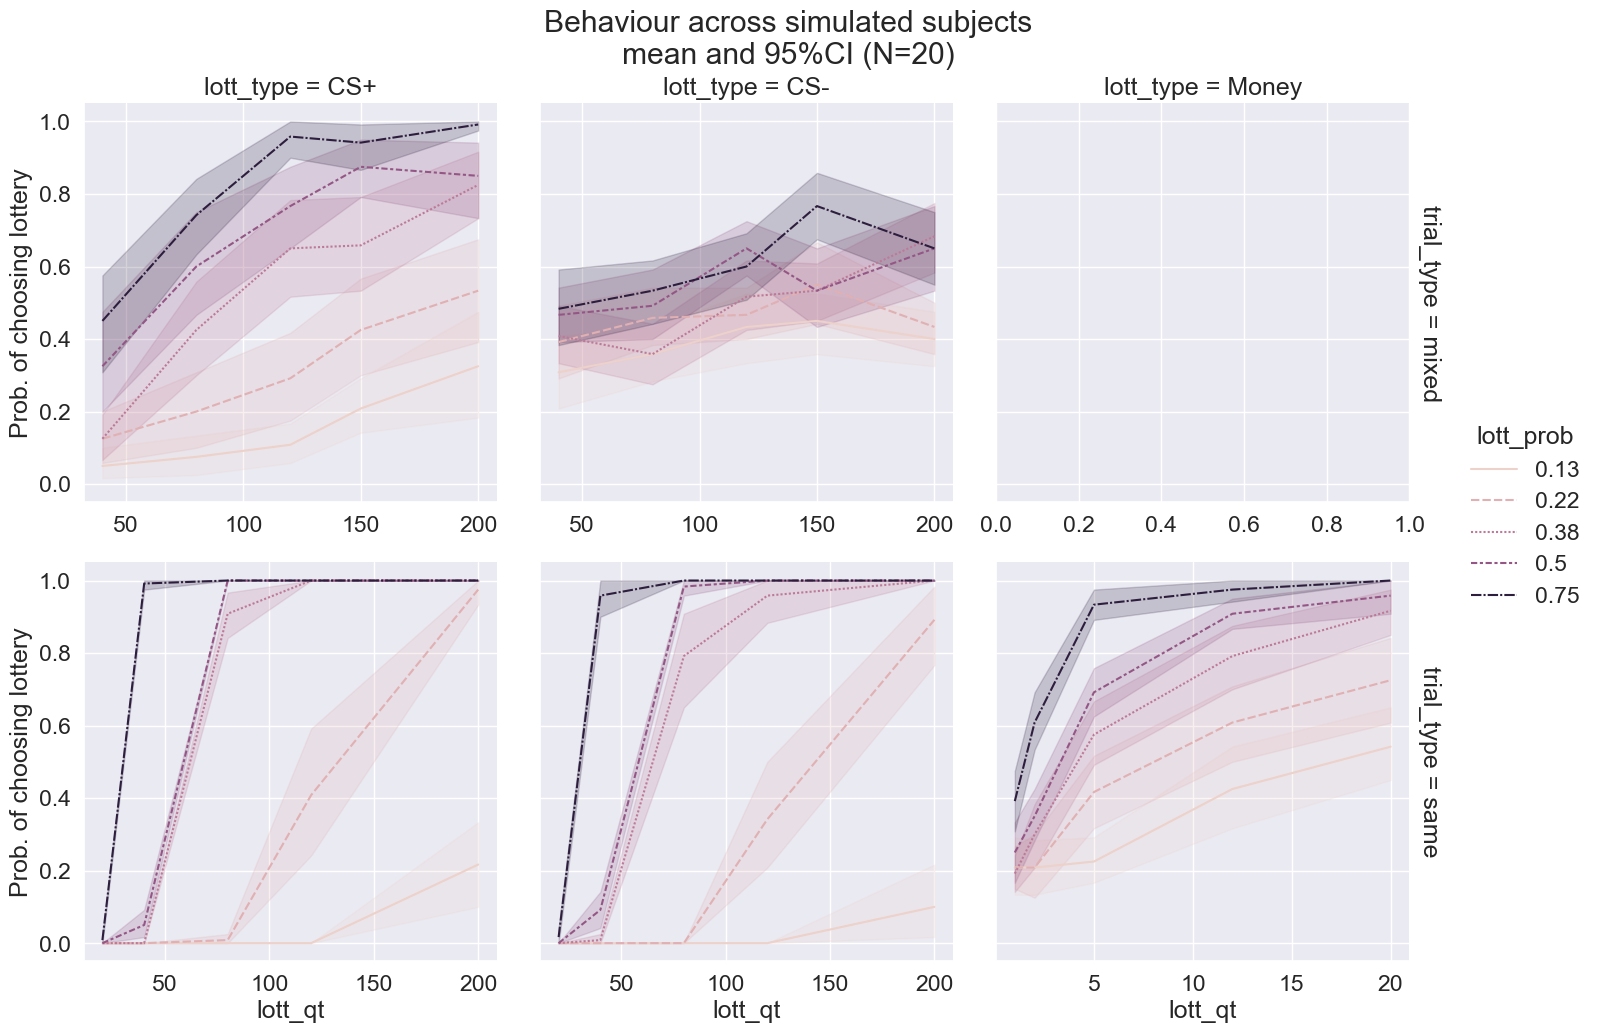

In [256]:
# INPUTS
allTrials_df = allTrials_df.copy()
N_subs = 20
x0 = x0_10params
#                         (mean, sd)
mean_std_st_money_alpha = (0.7, 0.1)
mean_std_st_cPlus_alpha = (0.8, 0.1)
mean_std_st_cMinus_alpha = (0.8, 0.1)
mean_std_st_money_beta = (1.8, 0.3)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = (10, 0.3)
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.02, 0.005)
mean_std_cMinus_sFactor = mean_std_cPlus_sFactor

plot_behaviour = True
output = 'long_flags'

(st_pars, mt_pars, 
 st_estPars, mt_estPars, 
 st_hessians, mt_hessians, 
 st_iterParams_df, mt_iterParams_df, 
 st_flags, mt_flags) = simANDfit_multiParticipants(allTrials_df, N_subs, x0, 
                                    mean_std_st_money_alpha, mean_std_st_cPlus_alpha, mean_std_st_cMinus_alpha,
                                    mean_std_st_money_beta, mean_std_st_cPlus_beta, mean_std_st_cMinus_beta,
                                    mean_std_mt_cPlus_beta, mean_std_mt_cMinus_beta, 
                                    mean_std_cPlus_sFactor, mean_std_cMinus_sFactor,
                                    plot_behaviour = True, startFromBehaviour = True,
                                    N_optimizers=10, output = 'long_flags')

### Pack same type trials results and plot parameters

In [257]:
st_success_df = pd.DataFrame(st_flags, columns = ['model fit'])
st_success_df.index.name = 'n_sub'

In [258]:
if x0 == x0_6params:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'beta']
else:
    st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ ST beta', 'CS- ST beta']


st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'n_sub'
st_params_df = st_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')

st_params_df

,n_sub,parameter,Observed value
0,0,Money alpha,0.611624
1,1,Money alpha,0.922941
2,2,Money alpha,0.722469
3,3,Money alpha,0.640004
4,4,Money alpha,0.610914
...,...,...,...
115,15,CS- ST beta,1.636514
116,16,CS- ST beta,1.631938
117,17,CS- ST beta,1.526793
118,18,CS- ST beta,2.065023


In [259]:

st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df.index.name = 'n_sub'
st_estParams_df

,Money alpha,CS+ alpha,CS- alpha,Money beta,CS+ ST beta,CS- ST beta
n_sub,,,,,,
0,0.608744,0.741963,0.757764,2.052640,1.062823,1.482512
1,0.926765,0.737722,0.621531,2.435790,1.863532,2.984260
2,0.814258,0.867557,0.818407,1.476848,3.211866,1.075509
3,0.691410,0.887448,0.994438,2.183813,15.136453,9.157965
4,0.472334,0.704733,0.541451,1.992327,20.671265,2.338109
5,0.595155,0.755567,0.825595,0.892136,28.306545,1.877509
6,0.632024,0.823598,0.867557,1.845998,1.945510,3.211865
7,1.139227,0.859554,0.769645,1.110049,2.580887,1.449803
8,0.683111,0.910938,0.771910,1.768001,1.991591,1.909207


In [260]:

st_estParams_df = st_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

st_po_df = st_params_df.merge(st_estParams_df, on= ['n_sub','parameter'])
st_po_df = st_po_df.merge(st_success_df.reset_index(),on='n_sub')
st_po_df

,n_sub,parameter,Observed value,Predicted value,model fit
0,0,Money alpha,0.611624,0.608744,Optimization terminated successfully.
1,0,CS+ alpha,0.721383,0.741963,Optimization terminated successfully.
2,0,CS- alpha,0.771289,0.757764,Optimization terminated successfully.
3,0,Money beta,1.803012,2.052640,Optimization terminated successfully.
4,0,CS+ ST beta,1.148582,1.062823,Optimization terminated successfully.
...,...,...,...,...,...
115,19,CS+ alpha,0.809808,0.771910,Optimization terminated successfully.
116,19,CS- alpha,0.759437,0.771910,Optimization terminated successfully.
117,19,Money beta,1.539112,1.508461,Optimization terminated successfully.
118,19,CS+ ST beta,1.831453,1.909207,Optimization terminated successfully.


In [261]:
print(sorted(list(st_po_df['model fit'].unique()), reverse=True))
st_pars_minMax = st_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(st_params_colNames)
st_pars_minMax

['Optimization terminated successfully.', 'Desired error not necessarily achieved due to precision loss.']


,min,max
parameter,,
Money alpha,0.424064,0.922941
CS+ alpha,0.687177,0.909697
CS- alpha,0.533621,0.950937
Money beta,1.207111,2.260312
CS+ ST beta,1.148582,2.335450
CS- ST beta,1.157721,2.517847


In [262]:
col_wrap = 3
fig = px.scatter(st_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':st_params_colNames,
                                  'model fit':sorted(list(st_po_df['model fit'].unique()), reverse=True) },
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (same type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )


fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, x1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       y0=st_pars_minMax.iloc[2,0] - st_pars_minMax.iloc[2,1]*0.025, y1=st_pars_minMax.iloc[2,1] + st_pars_minMax.iloc[2,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=0, 
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[0,0], x1=st_pars_minMax.iloc[0,1], 
                       y0=st_pars_minMax.iloc[0,0], y1=st_pars_minMax.iloc[0,1], 
                       line_color="black", line_dash='dash'), 
                  row=0, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, x1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       y0=st_pars_minMax.iloc[1,0] - st_pars_minMax.iloc[1,1]*0.025, y1=st_pars_minMax.iloc[1,1] + st_pars_minMax.iloc[1,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=0, col=2,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, x1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       y0=st_pars_minMax.iloc[3,0] - st_pars_minMax.iloc[3,1]*0.025, y1=st_pars_minMax.iloc[3,1] + st_pars_minMax.iloc[3,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=1,
                  # label=dict(text="ideal result", textposition = 'bottom right', 
                  #            xanchor = 'right', yanchor='bottom', textangle=0),
                 )


if x0 != x0_6params:
    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, x1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       y0=st_pars_minMax.iloc[5,0] - st_pars_minMax.iloc[5,1]*0.025, y1=st_pars_minMax.iloc[5,1] + st_pars_minMax.iloc[5,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=0,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

    fig.add_shape(dict(type="line", 
                       x0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, x1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       y0=st_pars_minMax.iloc[4,0] - st_pars_minMax.iloc[4,1]*0.025, y1=st_pars_minMax.iloc[4,1] + st_pars_minMax.iloc[4,1]*0.025, 
                       line_color="black", line_dash='dash'), 
                  row=1, col=2,
               #    label=dict(text="ideal result", textposition = 'bottom right', 
               #               xanchor = 'right', yanchor='bottom', textangle=0),
                 )

fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed same type parameters.html")

### Pack mixed type trials results and plot parameters

In [263]:
mt_success_df = pd.DataFrame(mt_flags, columns = ['model fit'])
mt_success_df.index.name = 'n_sub'

if x0 == x0_6params:
    mt_params_colNames = ['CS+ sFactor', 'CS- sFactor',]
else:
    mt_params_colNames = ['CS+ MT beta', 'CS- MT beta', 
                          'CS+ sFactor', 'CS- sFactor',]


mt_params_df = pd.DataFrame(mt_pars).T
mt_params_df.columns= mt_params_colNames
mt_params_df.index.name = 'n_sub'
mt_params_df = mt_params_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Observed value')


mt_estParams_df = pd.DataFrame(mt_estPars).T
mt_estParams_df.columns= mt_params_colNames
mt_estParams_df.index.name = 'n_sub'
mt_estParams_df = mt_estParams_df.reset_index().melt(id_vars = 'n_sub', var_name = 'parameter', value_name = 'Predicted value')

mt_po_df = mt_params_df.merge(mt_estParams_df, on= ['n_sub','parameter'])
mt_po_df = mt_po_df.merge(mt_success_df.reset_index(),on='n_sub')
mt_po_df

,n_sub,parameter,Observed value,Predicted value,model fit
0,0,CS+ MT beta,9.885932,0.397633,Optimization terminated successfully.
1,0,CS- MT beta,1.382090,4.520379,Optimization terminated successfully.
2,0,CS+ sFactor,0.021543,0.357154,Optimization terminated successfully.
3,0,CS- sFactor,0.023527,3.221084,Optimization terminated successfully.
4,1,CS+ MT beta,9.510508,0.600201,Optimization terminated successfully.
...,...,...,...,...,...
75,18,CS- sFactor,0.026581,-1569.617871,Desired error not necessarily achieved due to ...
76,19,CS+ MT beta,9.390338,0.263751,Optimization terminated successfully.
77,19,CS- MT beta,2.090680,13.943475,Optimization terminated successfully.
78,19,CS+ sFactor,0.023729,0.158109,Optimization terminated successfully.


In [264]:
print(mt_po_df['model fit'].unique())
mt_pars_minMax = mt_po_df[['parameter', 'Observed value']].groupby('parameter').describe().droplevel(0,axis = 1)[['min','max']].reindex(mt_params_colNames)
mt_pars_minMax

['Optimization terminated successfully.'
 'Desired error not necessarily achieved due to precision loss.']


,min,max
parameter,,
CS+ MT beta,9.355115,10.614492
CS- MT beta,1.339872,2.526539
CS+ sFactor,0.009151,0.026214
CS- sFactor,0.013621,0.026885


In [265]:
col_wrap = 2
fig = px.scatter(mt_po_df , x= 'Predicted value', y='Observed value', color="model fit",
                 symbol = 'model fit', facet_col = 'parameter', facet_col_wrap = col_wrap,
                 category_orders={'parameter':mt_params_colNames,
                                  'model fit': sorted(list(mt_po_df['model fit'].unique()), reverse=True)},
                facet_col_spacing=0.04, # default is 0.03
              height=600, width=800,
                )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_layout(
        title = '''Predicted vs Observed values (mixed type trials) <span style="font-size: 12px;">dashed line represents ideal result</span>'''
        )
# fig.add_shape(dict(type="line", 
#                        x0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, x1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
#                        y0=mt_pars_minMax.iloc[1,0] - mt_pars_minMax.iloc[1,1]*0.025, y1=mt_pars_minMax.iloc[1,1] + mt_pars_minMax.iloc[1,1]*0.025, 
#                        line_color="black", line_dash='dash'), 
#                   row=0, col=0, 
#                   # label=dict(text="ideal result", textposition = 'bottom left', 
#                   #            xanchor = 'left', yanchor='bottom', textangle=0),
#                  )

# fig.add_shape(dict(type="line", 
#                        x0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, x1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
#                        y0=mt_pars_minMax.iloc[0,0] - mt_pars_minMax.iloc[0,1]*0.025, y1=mt_pars_minMax.iloc[0,1] + mt_pars_minMax.iloc[0,1]*0.025, 
#                        line_color="black", line_dash='dash'), 
#                   row=0, col=1, 
#                   # label=dict(text="ideal result", textposition = 'bottom left', 
#                   #            xanchor = 'left', yanchor='bottom', textangle=0),
#                  )


    
fig.show()
# fig.write_html("/mnt/data1/francisco/predicted vs observed mixed type parameters.html")